# Load the data 

In [1]:
# Import basic libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Load the dataset 

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# Read the first few rows from the dataset

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


# Data Cleaning

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print(df['TotalCharges'].isna().sum())

11


In [7]:
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [8]:
# Drop rows with missing TotalCharges (these are usually new customers with tenure = 0)

df = df[df['TotalCharges'].notna()]

In [9]:
df.drop('customerID', axis=1, inplace=True)

df.reset_index(drop=True, inplace=True)

df.shape

(7032, 20)

# Encode categorical variables

In [10]:
# First, convert target column
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Binary columns to label encode
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
               'PaperlessBilling']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

# One-hot encode multi-class categorical columns
multi_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
              'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=multi_cols)

# Check final data types and shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   PaperlessBilling                         7032 non-null   int64  
 7   MonthlyCharges                           7032 non-null   float64
 8   TotalCharges                             7032 non-null   float64
 9   Churn                                    7032 non-null   int64  
 10  MultipleLines_No                         7032 no

# Exploratory Data Analysis

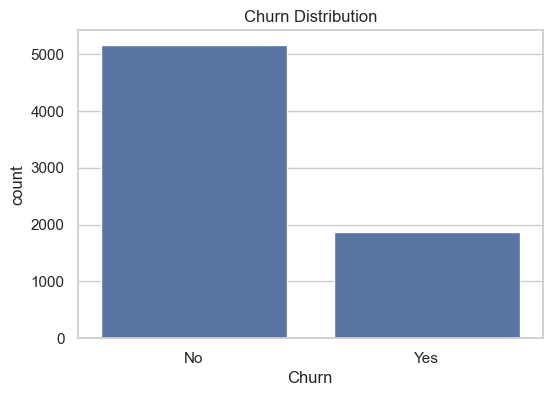

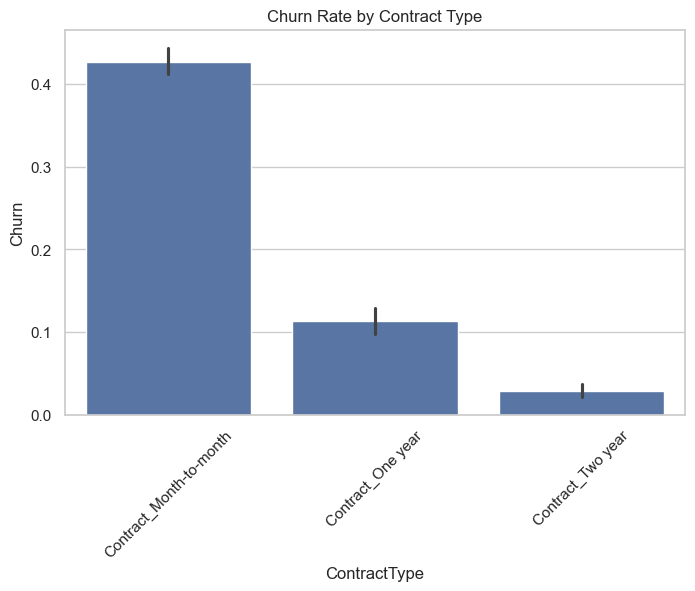

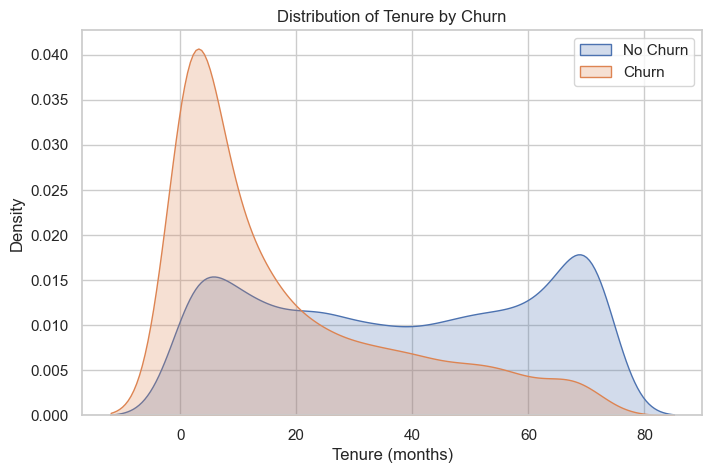

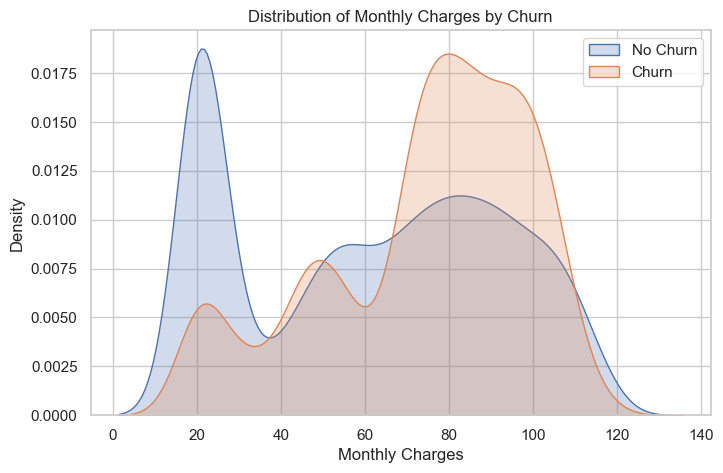

In [11]:
sns.set_theme(style="whitegrid")

# Plot churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Plot churn rate by contract type
contract_cols = [col for col in df.columns if 'Contract' in col]
contract_df = df[['Churn'] + contract_cols]

# Melt dataframe for easier plotting
contract_melt = contract_df.melt(id_vars='Churn', var_name='ContractType', value_name='Value')
contract_melt = contract_melt[contract_melt['Value'] == True]

plt.figure(figsize=(8,5))
sns.barplot(x='ContractType', y='Churn', data=contract_melt, estimator=np.mean)
plt.xticks(rotation=45)
plt.title('Churn Rate by Contract Type')
plt.show()

# Churn vs tenure (continuous)
plt.figure(figsize=(8,5))
sns.kdeplot(df[df['Churn']==0]['tenure'], label='No Churn', fill=True)
sns.kdeplot(df[df['Churn']==1]['tenure'], label='Churn', fill=True)
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure (months)')
plt.legend()
plt.show()

# Churn vs MonthlyCharges
plt.figure(figsize=(8,5))
sns.kdeplot(df[df['Churn']==0]['MonthlyCharges'], label='No Churn', fill=True)
sns.kdeplot(df[df['Churn']==1]['MonthlyCharges'], label='Churn', fill=True)
plt.title('Distribution of Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.legend()
plt.show()


# Handling imbalance

In [12]:
df['Churn'].value_counts(normalize=True)

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (4922, 40)
Test shape: (2110, 40)


# Modeling

## Logistic Regression

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1549
           1       0.50      0.80      0.62       561

    accuracy                           0.74      2110
   macro avg       0.70      0.76      0.71      2110
weighted avg       0.80      0.74      0.75      2110

ROC AUC Score: 0.8378431717777786


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


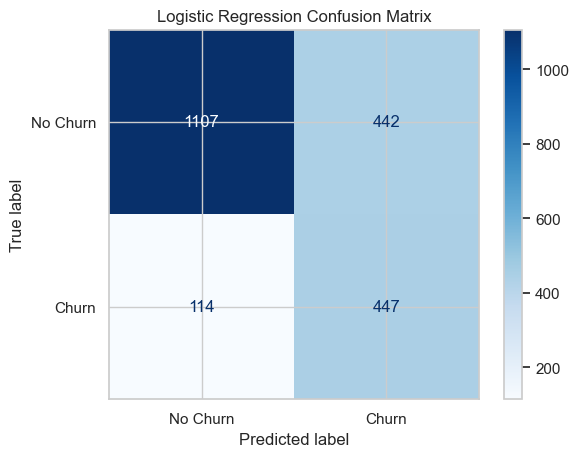

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay

# Initialize model with class_weight balanced
lr_model = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)

# Train
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)
y_prob = lr_model.predict_proba(X_test)[:, 1]

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


### Feature Importance

In [15]:
# Get coefficients
coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_[0]
})

# Sort by absolute value
coeff_df['abs_coeff'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='abs_coeff', ascending=False)

# Show top 10
print(coeff_df[['Feature', 'Coefficient']].head(10))


                           Feature  Coefficient
33         Contract_Month-to-month     0.796617
13     InternetService_Fiber optic     0.751755
35               Contract_Two year    -0.650357
12             InternetService_DSL    -0.430391
32             StreamingMovies_Yes     0.353414
29                 StreamingTV_Yes     0.350754
15               OnlineSecurity_No     0.330674
24                  TechSupport_No     0.329631
38  PaymentMethod_Electronic check     0.305844
6                 PaperlessBilling     0.297314


#### Business Insights:

- Incentivize customers on month-to-month plans to switch to longer contracts (eg., discounts, loyalty perks).
- Promote security and tech support services to increase stickiness.
- Target Fiber customers with special retention offers (they’re more at risk).
- Address potential churn risk in customers using electronic checks (e.g., offer smoother auto-pay options).

## Random Forest Model

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      1549
           1       0.61      0.47      0.53       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110

ROC AUC Score: 0.8109734415510438


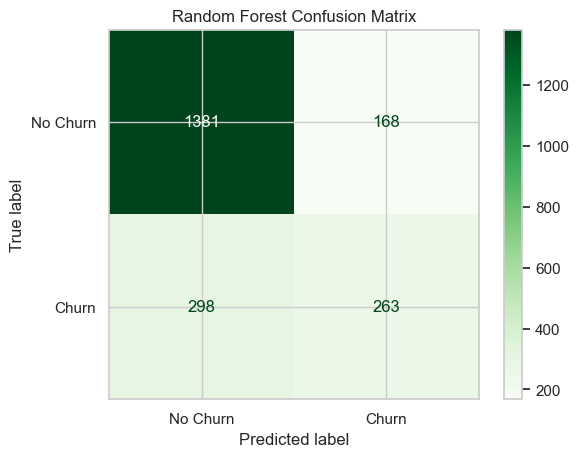

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

# Initialize Random Forest with class_weight balanced
rf_model = RandomForestClassifier(n_estimators=100, 
                                  random_state=42, 
                                  class_weight='balanced')

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))

# Confusion matrix plot
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Churn', 'Churn'])
disp_rf.plot(cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.show()


## Feature Importance

In [17]:
# Get feature importances
importances = rf_model.feature_importances_
feat_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show top 10
print(feat_df.head(10))


                           Feature  Importance
8                     TotalCharges    0.142971
4                           tenure    0.138207
7                   MonthlyCharges    0.133195
33         Contract_Month-to-month    0.093709
24                  TechSupport_No    0.038975
15               OnlineSecurity_No    0.030674
13     InternetService_Fiber optic    0.030401
35               Contract_Two year    0.026518
0                           gender    0.025155
38  PaymentMethod_Electronic check    0.025001


#### Business Insights

- TotalCharges and tenure: Customers who have spent more historically are less likely to churn. Focus on nurturing these relationships.

- High monthly charges: Consider revisiting pricing or providing added value for high spenders.

- Contract type: Encourage long-term contracts (e.g., loyalty discounts, extra perks).

- Tech support & security services: Promote as retention tools — customers without them are more at risk.

## XGBoost

In [27]:
!pip uninstall -y xgboost


Found existing installation: xgboost 3.0.3
Uninstalling xgboost-3.0.3:
  Successfully uninstalled xgboost-3.0.3


In [28]:
!pip install xgboost==1.7.6


  Using cached xgboost-1.7.6-py3-none-win_amd64.whl.metadata (1.9 kB)
Using cached xgboost-1.7.6-py3-none-win_amd64.whl (70.9 MB)



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
!pip uninstall -y xgboost scikit-learn
!pip install xgboost==1.7.6 scikit-learn==1.3.2


Found existing installation: xgboost 1.7.6
Uninstalling xgboost-1.7.6:
  Successfully uninstalled xgboost-1.7.6
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1


You can safely remove it manually.


  Using cached xgboost-1.7.6-py3-none-win_amd64.whl.metadata (1.9 kB)
Using cached xgboost-1.7.6-py3-none-win_amd64.whl (70.9 MB)
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.3 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.3 MB 2.4 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.3 MB 1.6 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/9.3 MB 1.3 MB/s eta 0:00:07
   ----- ---------------------------------- 1.3/9.3 MB 1.4 MB/s eta 0:00:06
   ------- -------------------------------- 1.8/9.3 MB 1.5 MB/s eta 0:00:05
   ---------- ----------------------------- 2.4/9.3 MB 1.6 MB/s eta 0:00:05
   ------------ --------------------------- 2.9/9.3 MB 1.8 MB/s eta 0:00:04
   --------------- ------------------------ 3.7/9.3 MB 2.0 MB/s eta 0:00:03
   ------------------ --------------------- 4.2/9.3 MB 2.0 MB/s eta 0:00:03
   ------------------- -------------------- 4.5/


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


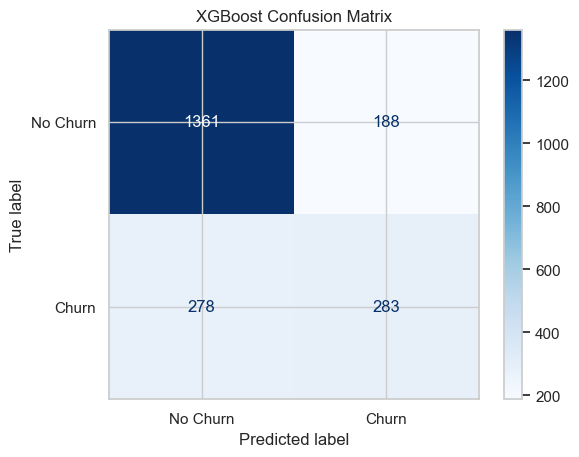

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1549
           1       0.60      0.50      0.55       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110

ROC AUC Score: 0.8188049561041624


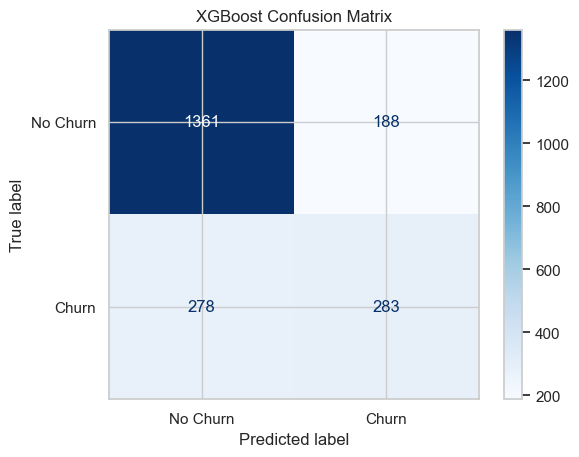

In [34]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_xgb))

# Manual confusion matrix (no from_estimator)
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.show()


## Feature Importance

In [35]:
# Get feature importances
importances = xgb_model.feature_importances_
feat_df_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show top 10
print(feat_df_xgb.head(10))


                        Feature  Importance
13  InternetService_Fiber optic    0.456223
33      Contract_Month-to-month    0.250403
12          InternetService_DSL    0.027069
35            Contract_Two year    0.025034
15            OnlineSecurity_No    0.016512
24               TechSupport_No    0.016308
32          StreamingMovies_Yes    0.012331
34            Contract_One year    0.011950
4                        tenure    0.011940
9              MultipleLines_No    0.010703


#### Business Insights

- Fiber optic customers churn more → consider targeted retention offers (e.g., bundles, loyalty discounts).
- Month-to-month contracts highly risky → incentivize moving to 1- or 2-year contracts.
- Streaming service users churn more → could be due to higher bills; create custom packages or value-added offers.
- No security or support services linked to churn → upsell or bundle support/security to increase loyalty.
- Electronic check users churn more → encourage them to switch to auto-pay or easier payment methods.

In [36]:
# Save using XGBoost native Booster save
xgb_model.get_booster().save_model('app/model/churn_model.json')

In [37]:
feature_names = X_train.columns.tolist()

import json
with open('app/model/feature_names.json', 'w') as f:
    json.dump(feature_names, f)
